In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
data = pd.read_csv('/Users/haddock_ana/Ironhack/Unit 7 - Machine Learning/lab-ML-1/Data/marketing_customer_analysis.csv') 
data.tail(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.2,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.6,Two-Door Car,Medsize


In [5]:
def get_numerical (df):
    numerical = df._get_numeric_data()
    return numerical
# numerical = df.select_dtypes(include=np.number)

In [6]:
numerical = get_numerical(data)

In [7]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [8]:
nulls = pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Customer Lifetime Value,0.0
1,Income,0.0
2,Monthly Premium Auto,0.0
3,Months Since Last Claim,0.0
4,Months Since Policy Inception,0.0
5,Number of Open Complaints,0.0
6,Number of Policies,0.0
7,Total Claim Amount,0.0


In [9]:
def get_outliers(df, num):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    for i in df.columns:
        iqr = np.percentile(df[i], 75) - np.percentile(df[i], 25)
        upper_limit = np.percentile(df[i], 75) + num * iqr
        lower_limit = np.percentile(df[i], 25) - num * iqr  # Corrected lower limit calculation
        df2 = df[(df[i] > lower_limit) & (df[i] < upper_limit)]

        # Plotting
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        sns.distplot(df[i], ax=axs[0])
        sns.distplot(df2[i], ax=axs[1])
        axs[0].set_title(f"Whith outliers")
        axs[1].set_title(f"Without outliers")
        plt.show()


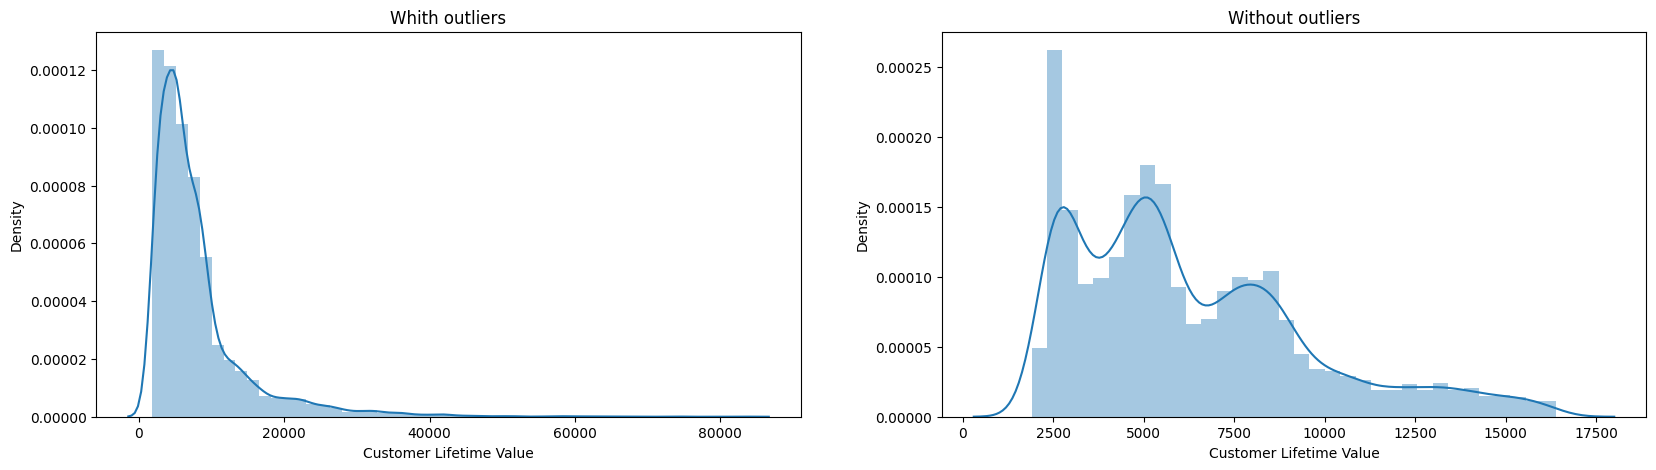

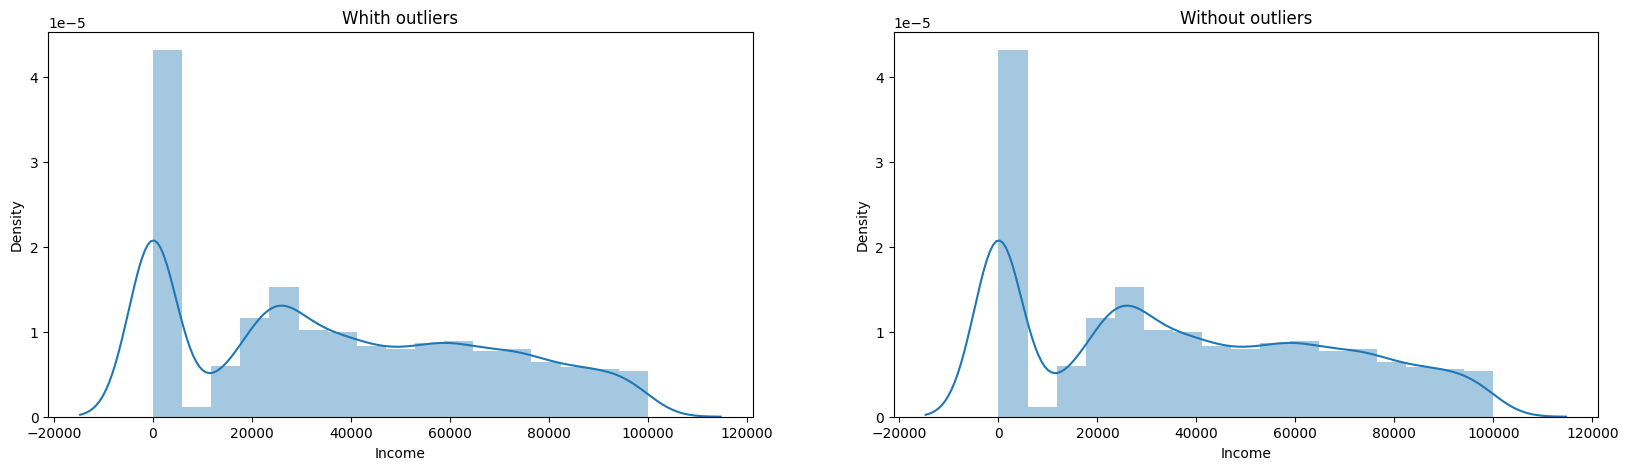

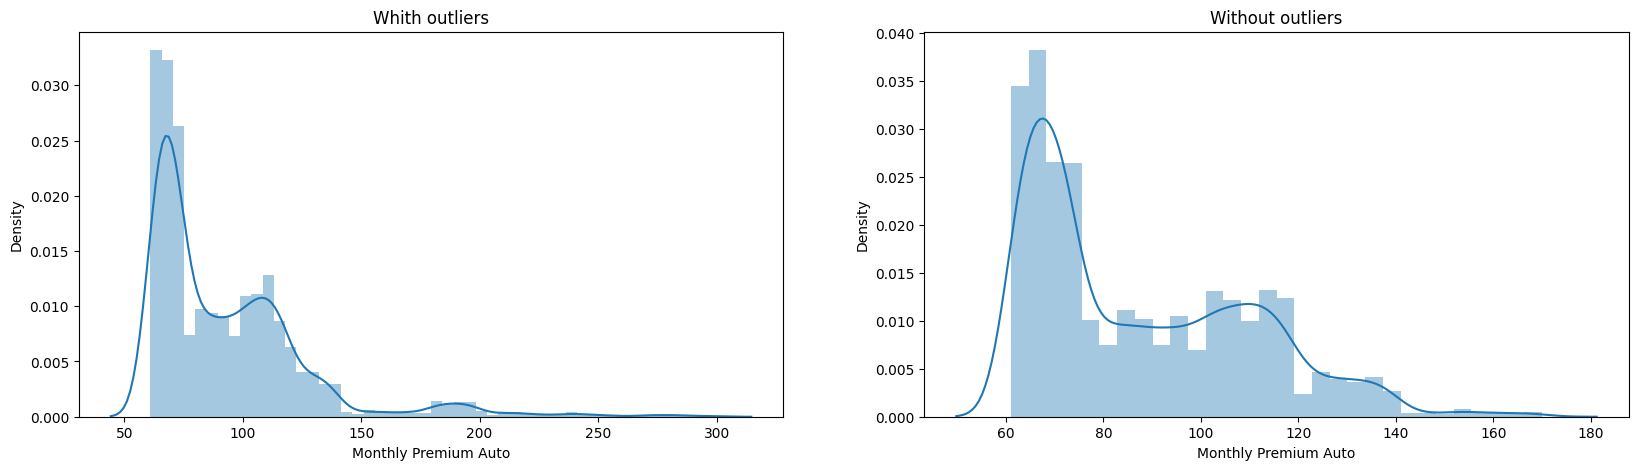

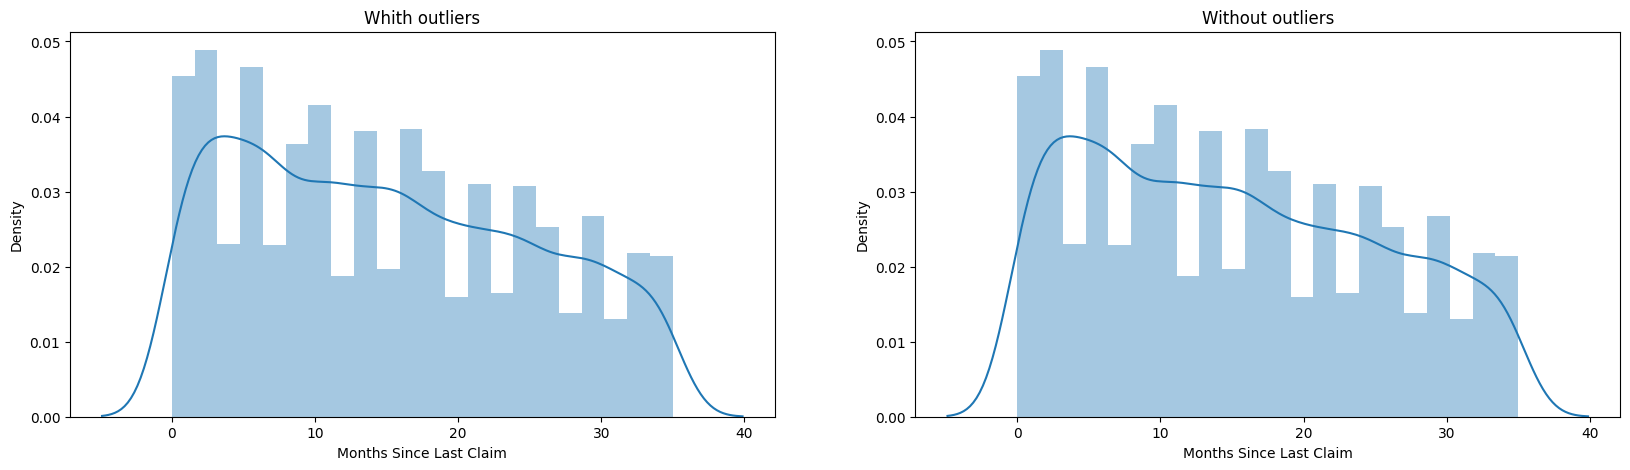

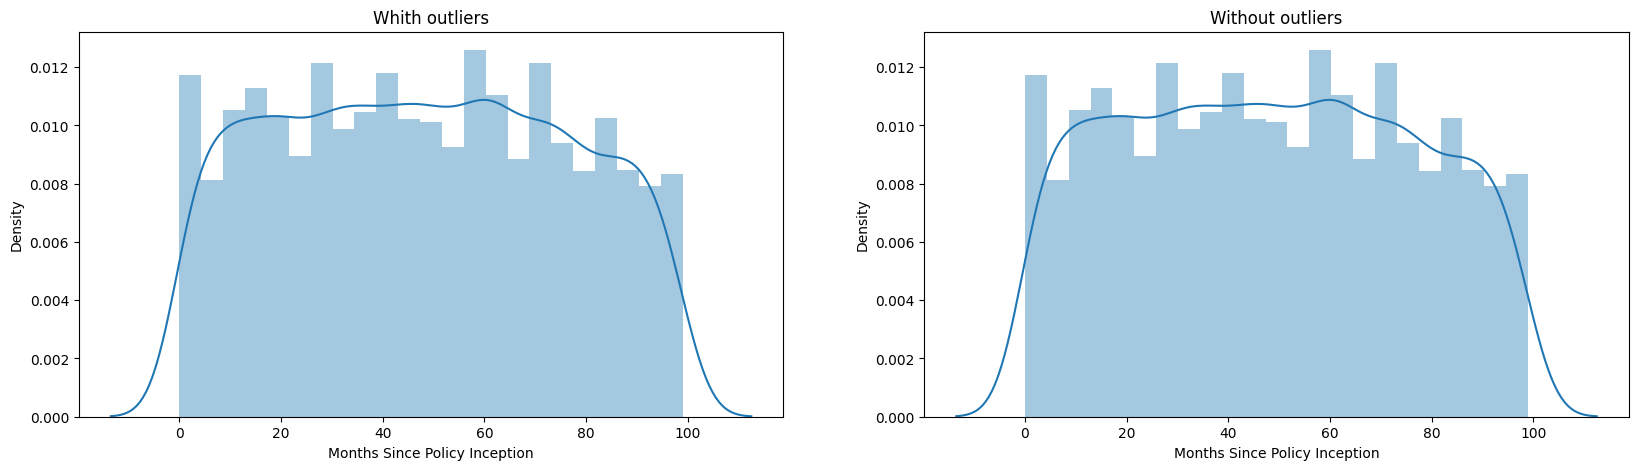

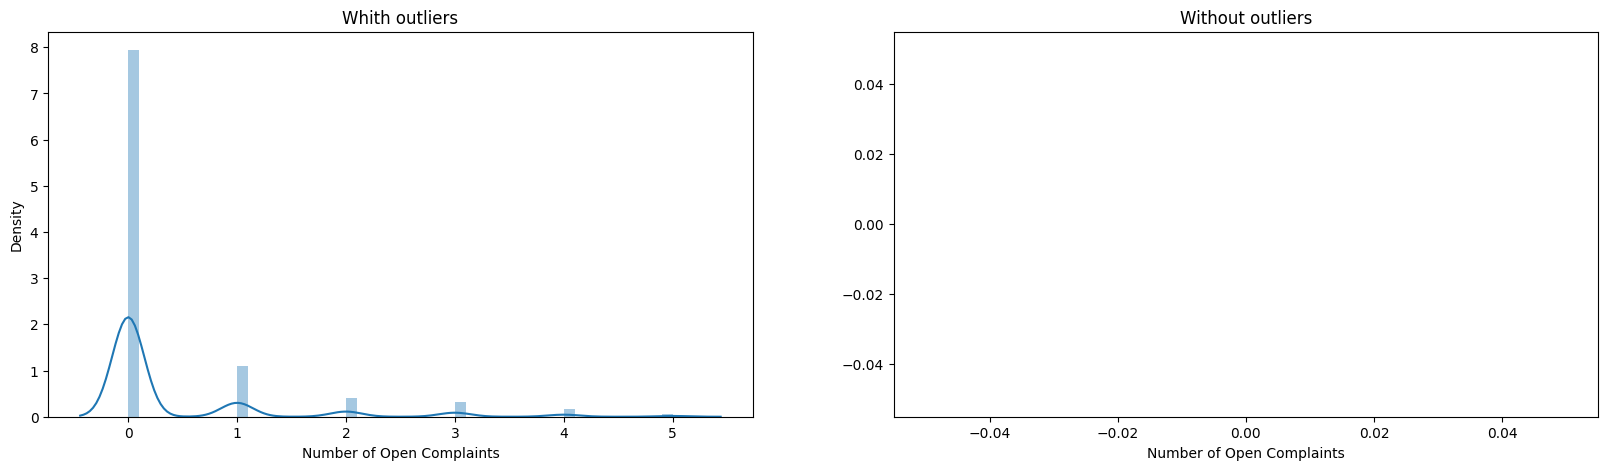

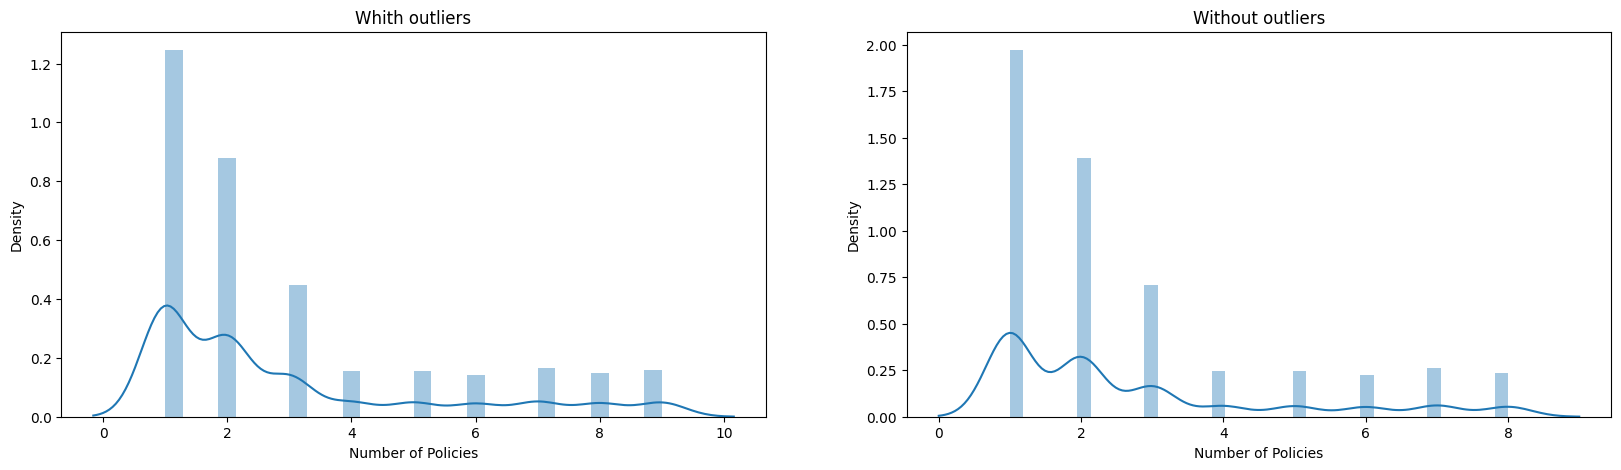

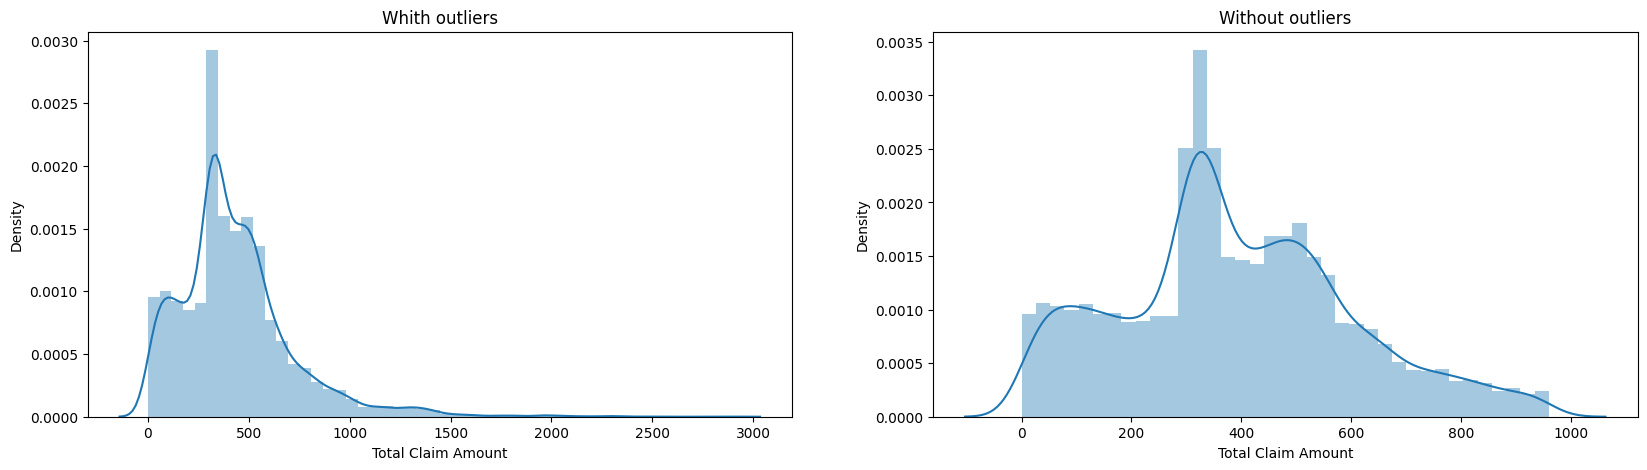

In [10]:
get_outliers(numerical, 1.5)

In [11]:
def get_outliers_barplot(df, num):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    for i in df.columns:
        iqr = np.percentile(df[i], 75) - np.percentile(df[i], 25)
        upper_limit = np.percentile(df[i], 75) + num * iqr
        lower_limit = np.percentile(df[i], 25) - num * iqr  # Corrected lower limit calculation
        df2 = df[(df[i] > lower_limit) & (df[i] < upper_limit)]

        # Plotting
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        sns.boxplot(df[i], ax=axs[0])
        sns.boxplot(df2[i], ax=axs[1])
        axs[0].set_title(f"Whith outliers")
        axs[1].set_title(f"Without outliers")
        plt.show()




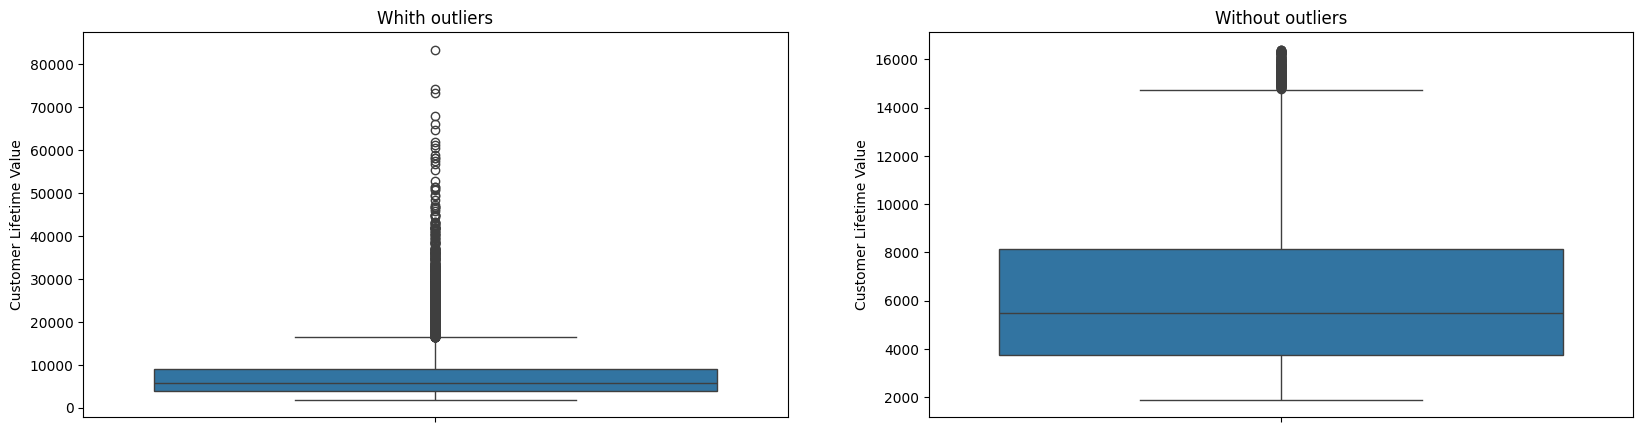

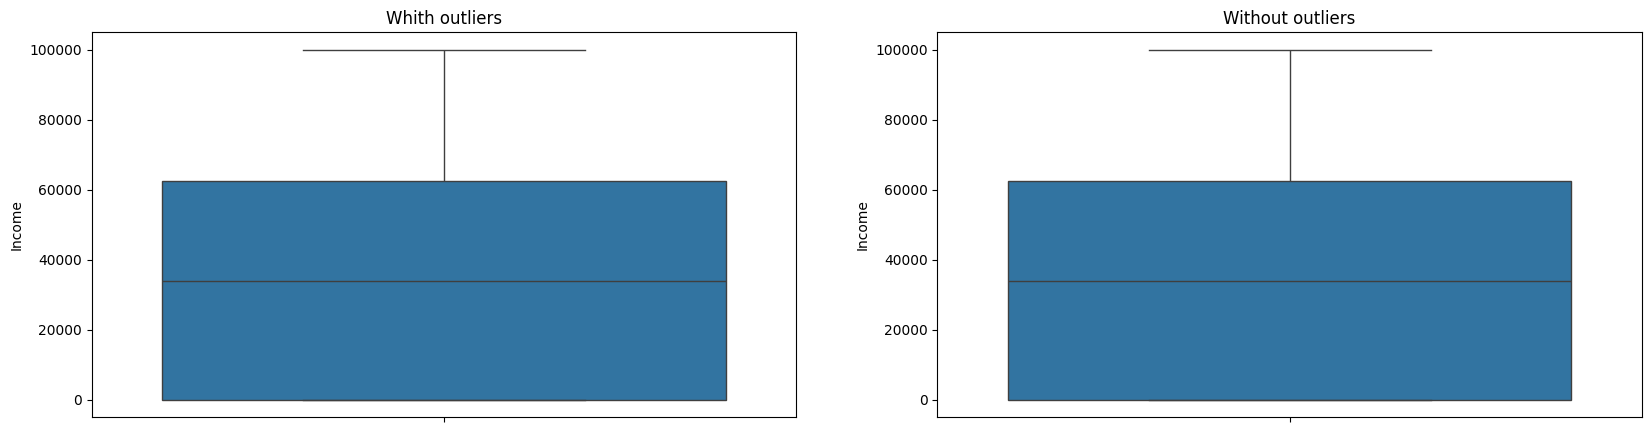

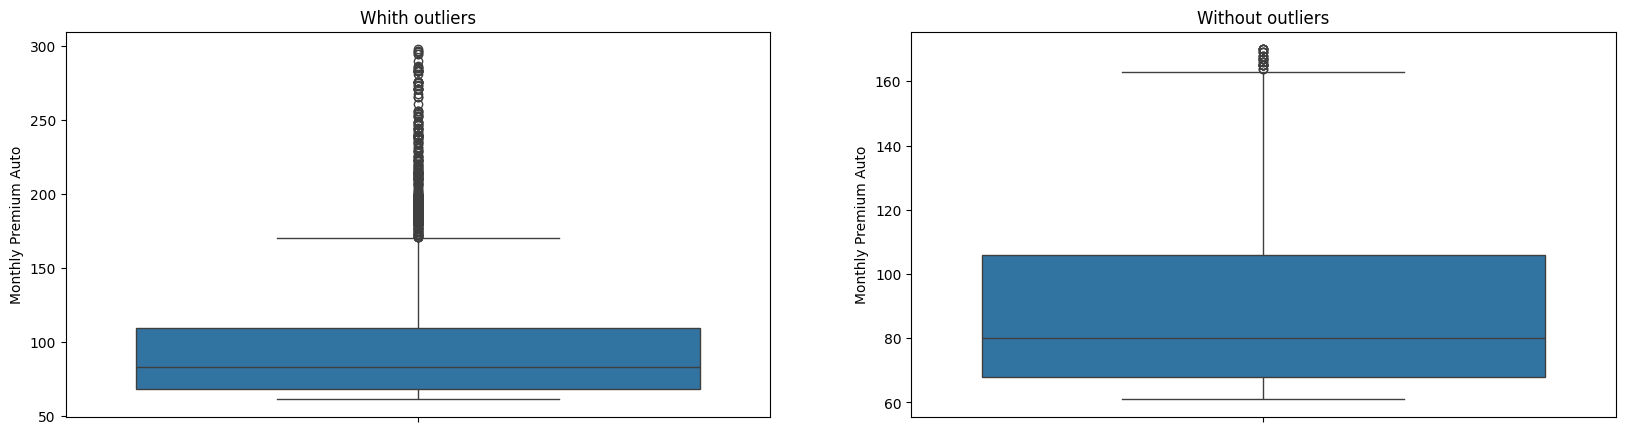

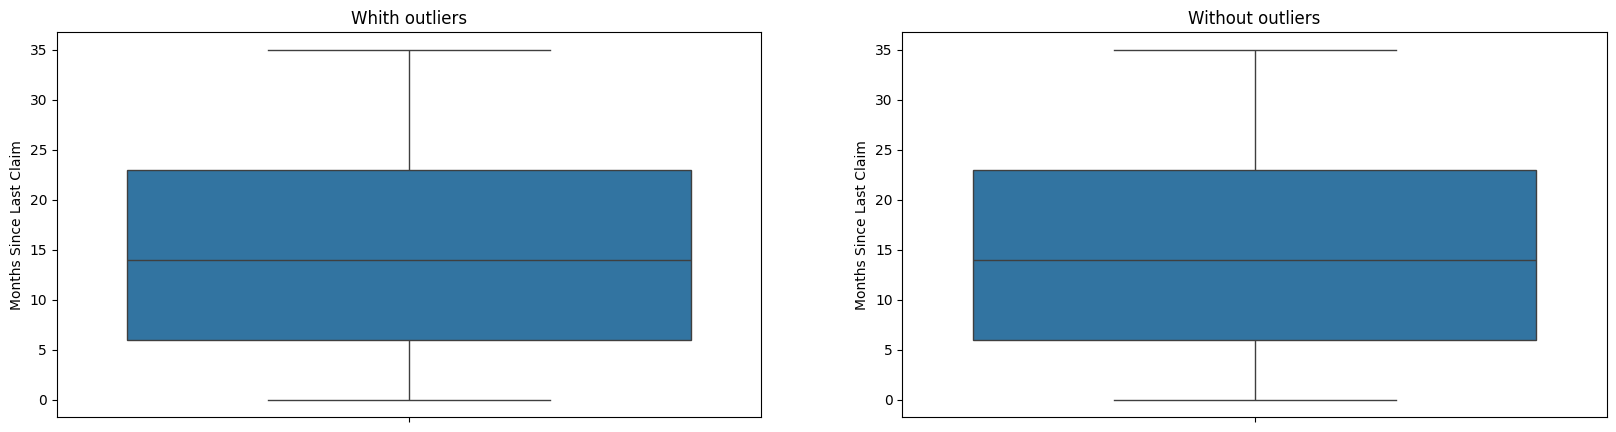

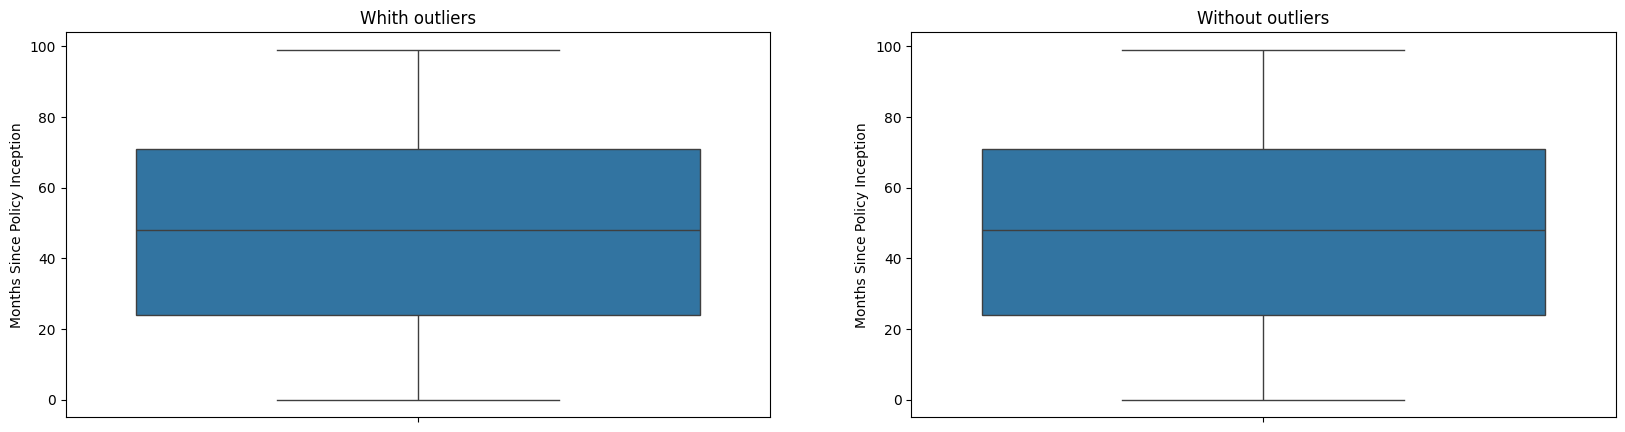

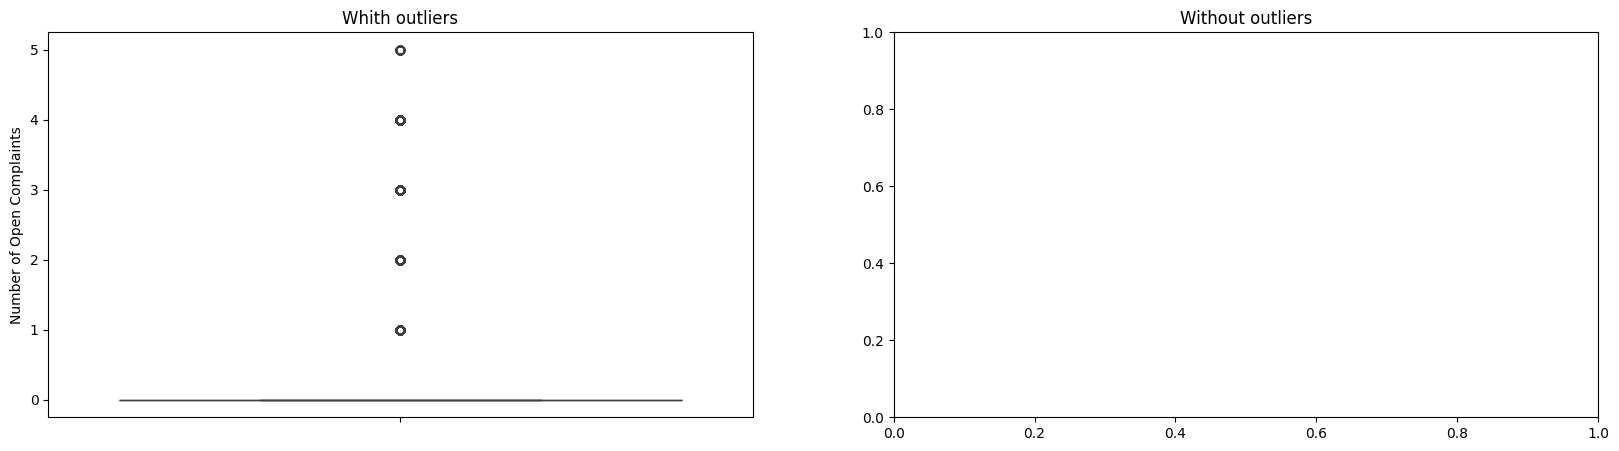

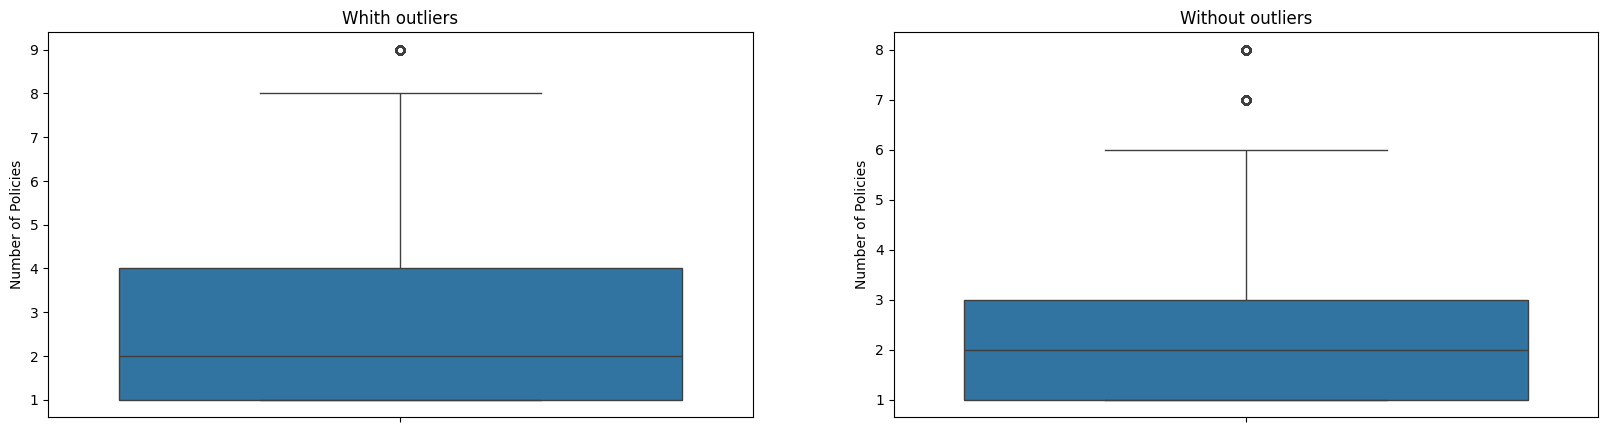

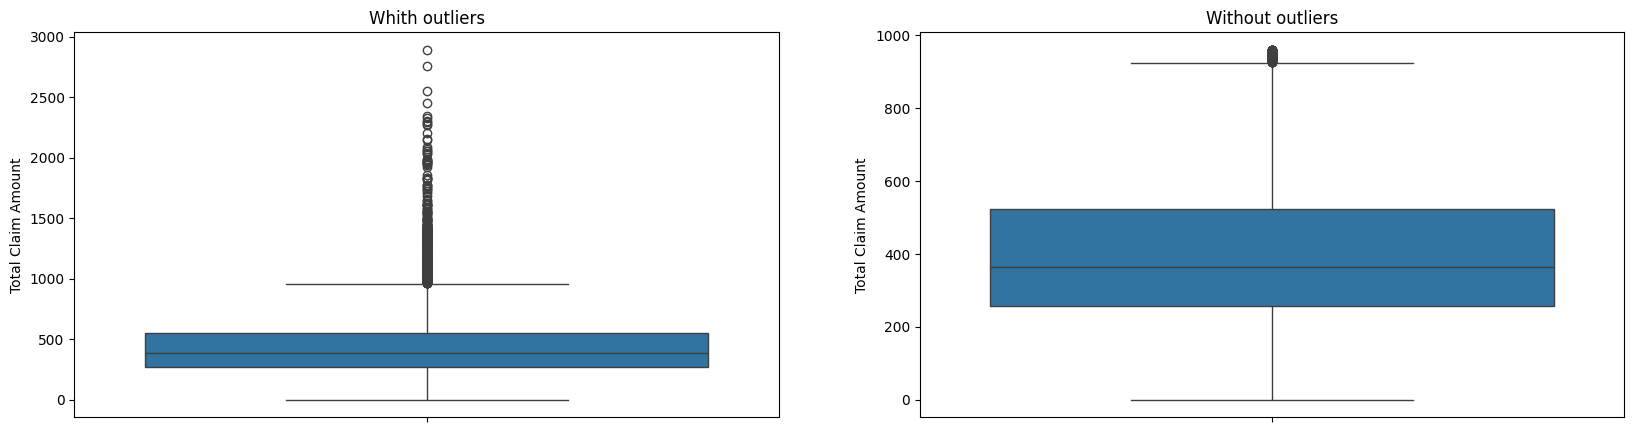

In [12]:
get_outliers_barplot(numerical, 1.5)

# Log transform

In [13]:
def get_log_displot(column):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    def log_transform_clean1(x):
        x = np.log(x)
        if np.isfinite(x):
            return x
        else:
            return 0
    
    name_log = list(map(log_transform_clean1, column))
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    
    sns.distplot(column, ax=axs[0])
    axs[0].set_title("Without log transformation")
    
    sns.distplot(name_log, ax=axs[1])
    axs[1].set_title("With log transformation")
    
    plt.show()




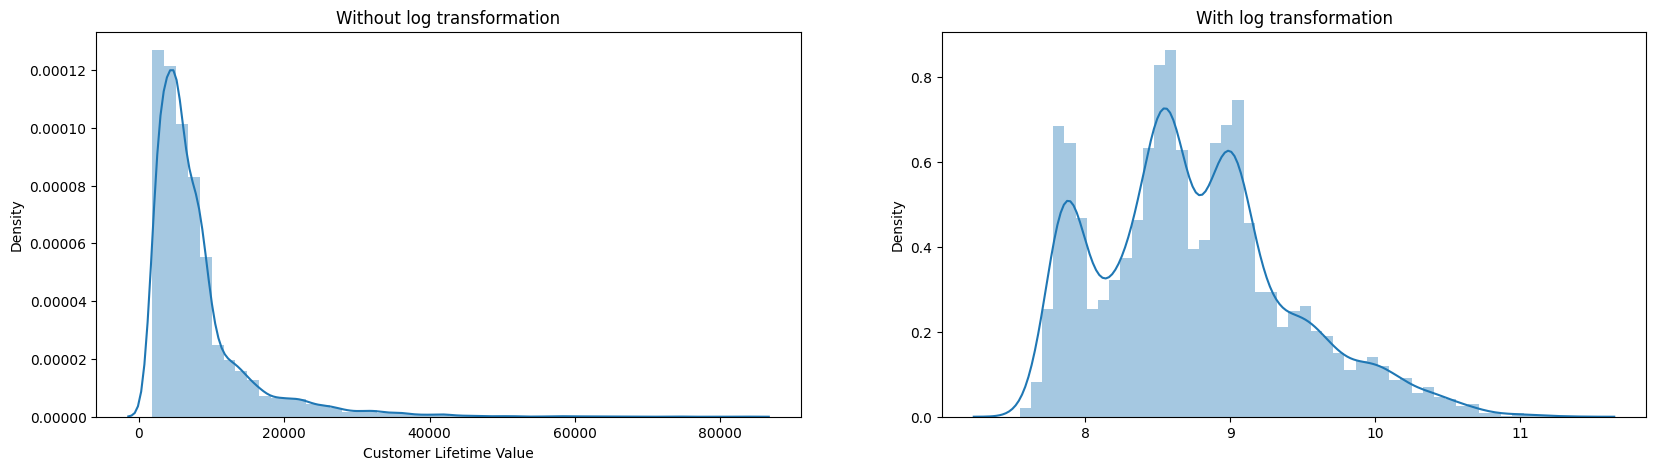

In [14]:
get_log_displot(numerical['Customer Lifetime Value'])

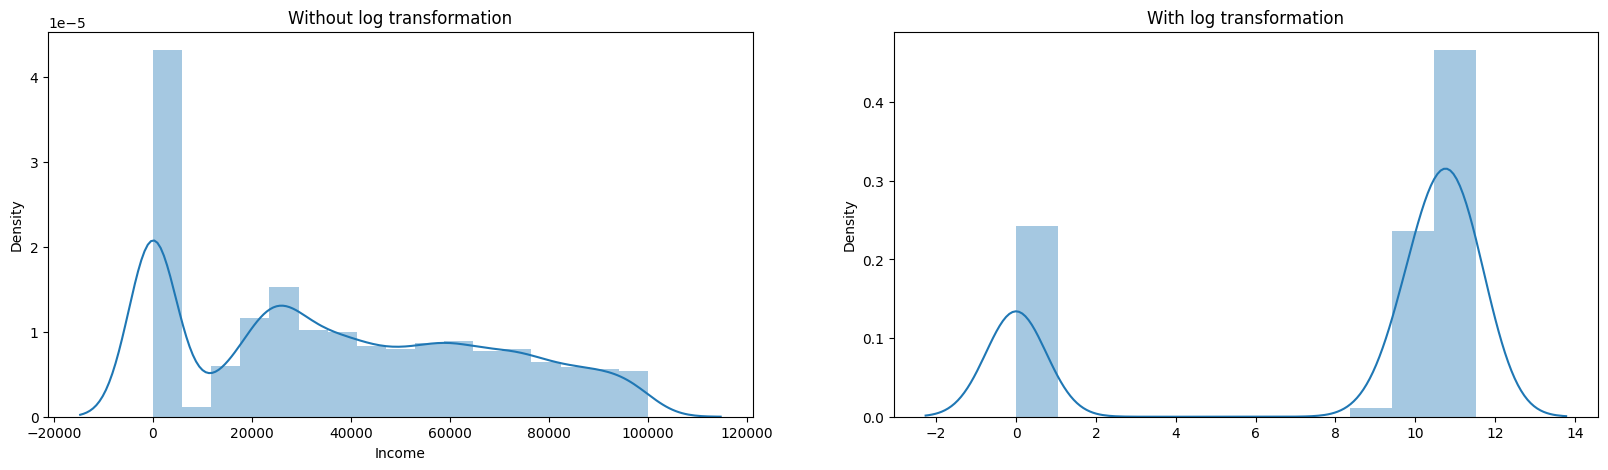

In [15]:
get_log_displot(numerical['Income'])

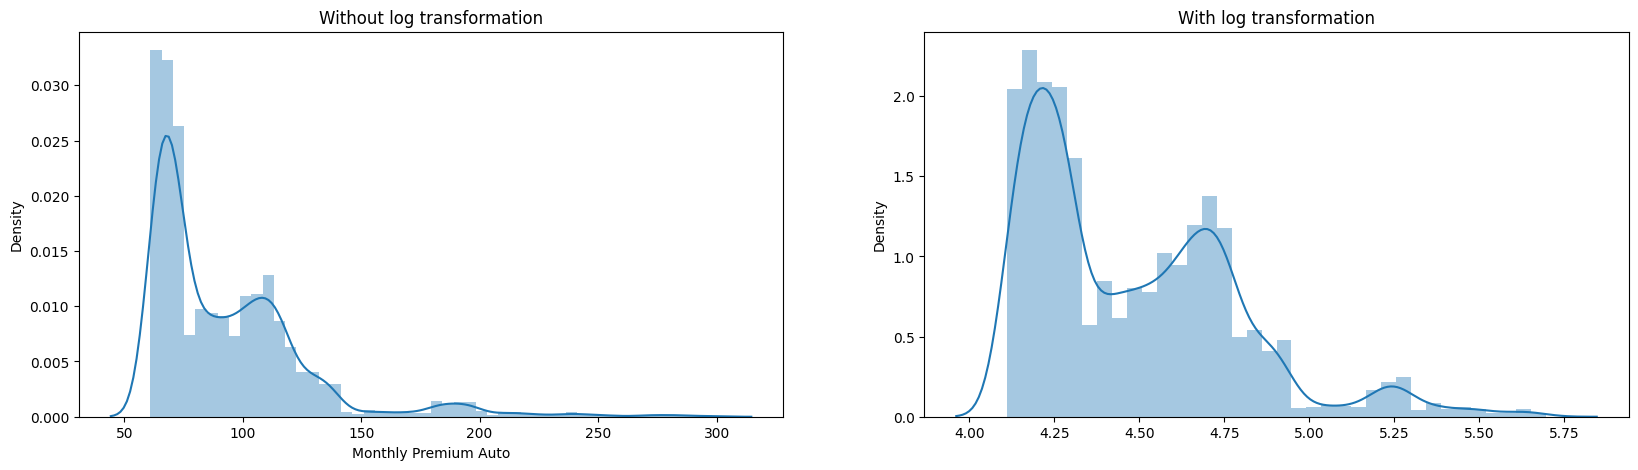

In [16]:
get_log_displot(numerical['Monthly Premium Auto'])

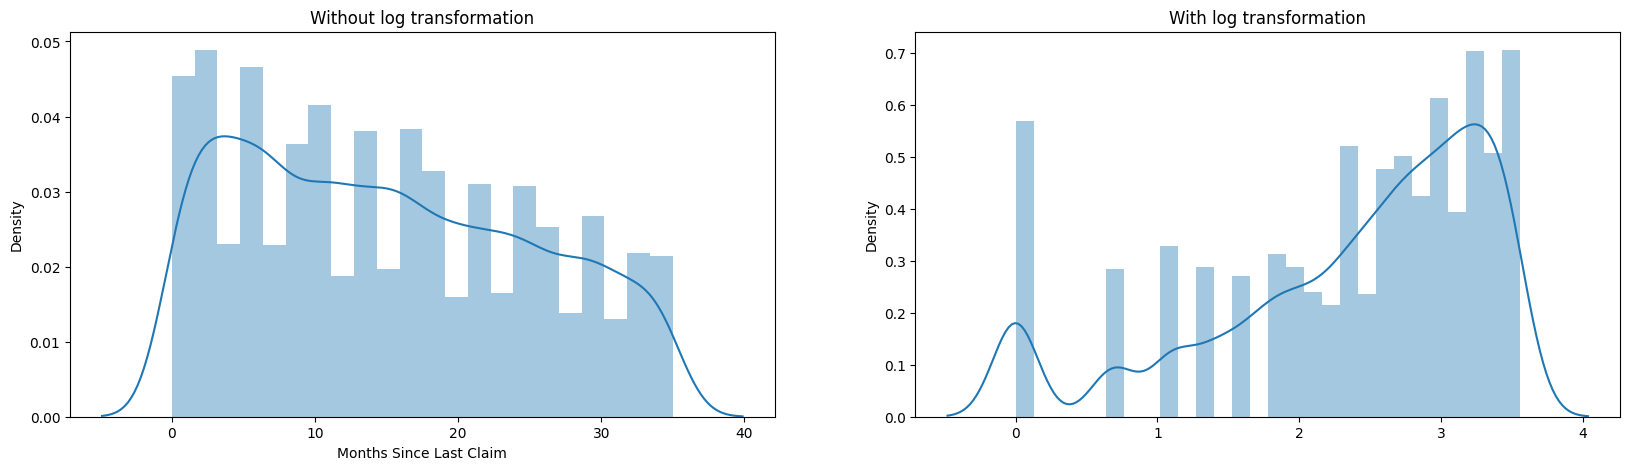

In [17]:
get_log_displot(numerical['Months Since Last Claim'])

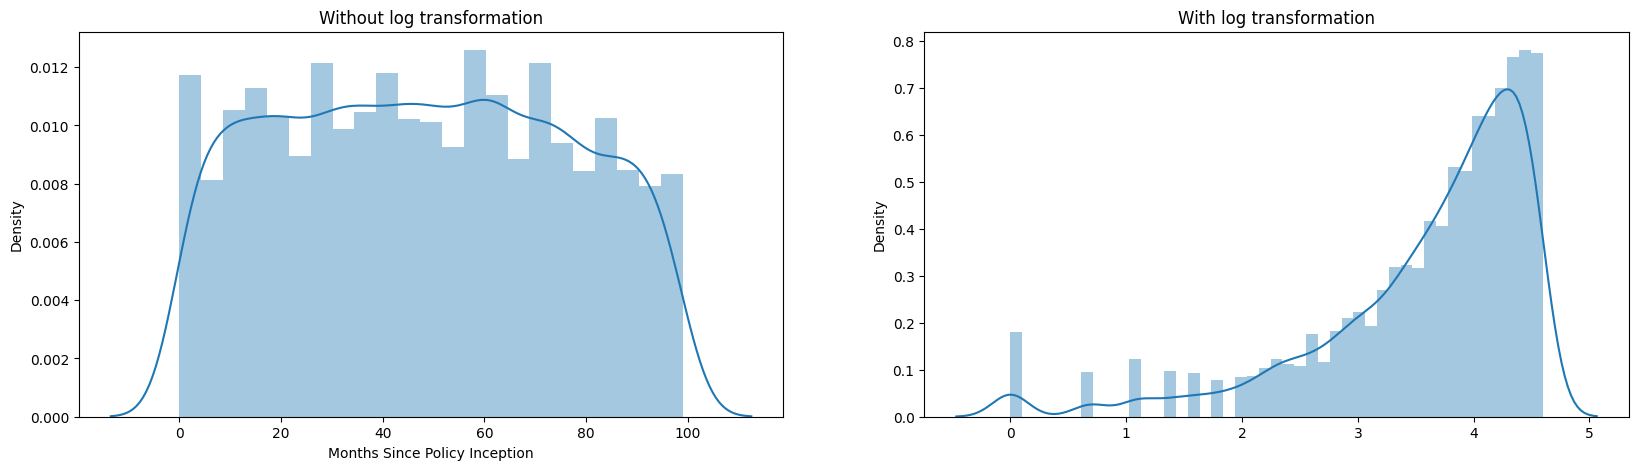

In [18]:
get_log_displot(numerical['Months Since Policy Inception'])

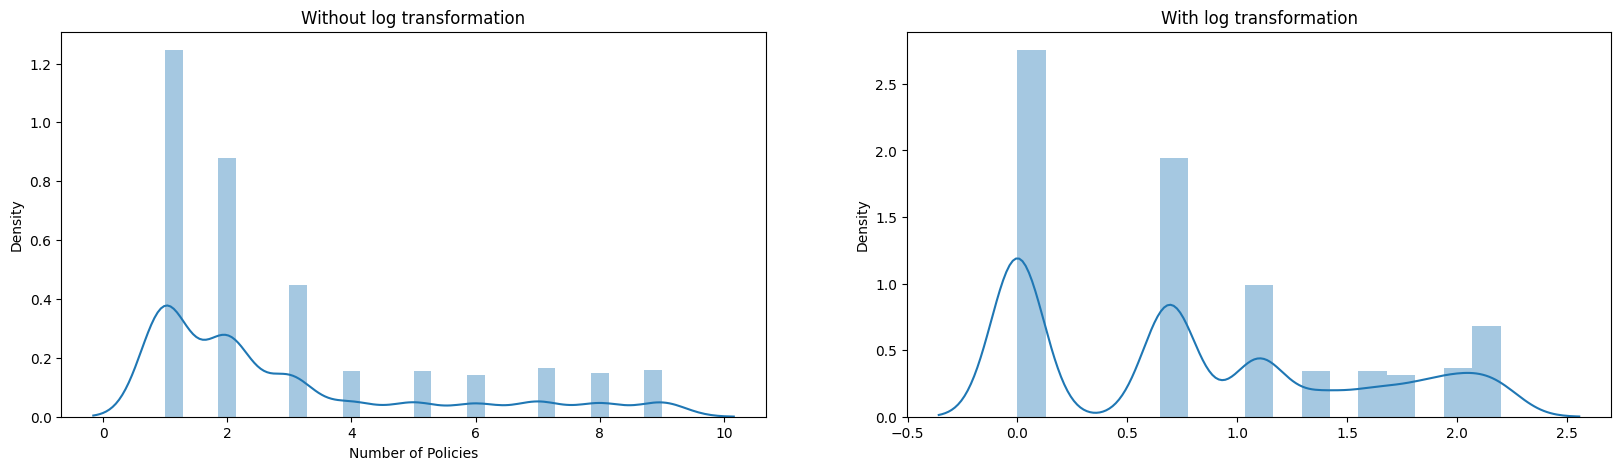

In [19]:
get_log_displot(numerical['Number of Policies'])

In [20]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# MinMaxScaler

In [21]:
X = numerical.drop(['Total Claim Amount'], axis=1)

In [22]:
transformer=MinMaxScaler().fit(X)
transformer
x_scaled=transformer.transform(X)
print(x_scaled.shape)
df_scaled = pd.DataFrame(x_scaled)

(9134, 7)


In [23]:
df_scaled

,0,1,2,3,4,5,6
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [24]:
df_scaled.describe()

,0,1,2,3,4,5,6
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
Y = numerical['Total Claim Amount'] # definimos la variable independiente
X = x_scaled


X = sm.add_constant(X) # define B agregando la constante
model = sm.OLS(Y,X).fit() #sm -> statsmodel oderlinesquares

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:13:17   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        397.2542      6.695     59.332      0.0

In [26]:
Y = numerical['Total Claim Amount'] # definimos la variable independiente
X = numerical.drop(['Total Claim Amount'], axis=1)


X = sm.add_constant(X) # define B agregando la constante
model = sm.OLS(Y,X).fit() #sm -> statsmodel oderlinesquares

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:11:48   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# StandardScaler

In [27]:
transformer=StandardScaler().fit(X)
x_normalized=transformer.transform(X)
print(x_normalized.shape)
df_normalized = pd.DataFrame(x_normalized)
df_normalized

(9134, 8)


,0,1,2,3,4,5,6,7
0,0.0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,0.0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,0.0,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,0.0,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...,...
9129,0.0,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,0.0,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.0,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,0.0,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [28]:
df_normalized.describe()

,0,1,2,3,4,5,6,7
count,9134.0,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03
mean,0.0,4.006235e-17,7.467933e-17,-1.487752e-16,4.472981e-17,1.003504e-16,7.623515e-17,-1.361342e-17
std,0.0,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,0.0,-8.888511e-01,-1.239617e+00,-9.364417e-01,-1.498803e+00,-1.722470e+00,-4.222496e-01,-8.226479e-01
25%,0.0,-5.837472e-01,-1.239617e+00,-7.329893e-01,-9.031338e-01,-8.623923e-01,-4.222496e-01,-8.226479e-01
50%,0.0,-3.238088e-01,-1.240322e-01,-2.970199e-01,-1.089082e-01,-2.314821e-03,-4.222496e-01,-4.042468e-01
75%,0.0,1.393223e-01,8.118515e-01,4.586604e-01,7.845956e-01,8.219261e-01,-4.222496e-01,4.325555e-01
max,0.0,1.096273e+01,2.051587e+00,5.951875e+00,1.975934e+00,1.825350e+00,5.070242e+00,2.524561e+00


In [32]:
Y = numerical['Total Claim Amount'] # definimos la variable independiente
X = x_normalized


X = sm.add_constant(X) # define B agregando la constante
model = sm.OLS(Y,X).fit() #sm -> statsmodel oderlinesquares

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:13:43   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.0888      2.110    205.765      0.0